In [255]:
%matplotlib inline

In [256]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [257]:
# Read in Joseph his spline functions
numu_spline = uproot.open('./input/numu_v13_v12_Ratio.root')
nue_spline = uproot.open('./input/nue_v13_v12_Ratio.root')
spline_x = numu_spline['Graph'].__dict__['_fX']
spline_y_numu = numu_spline['Graph'].__dict__['_fY']
spline_y_nue = nue_spline['Graph'].__dict__['_fY']
spline_y = {'nu':spline_y_numu, 'nue': spline_y_nue}

In [258]:
run_labs = ['run1_v12', 'run1_v13']

gr = 1.618
outdir= './output/xsec_v12v13/'
inputdir = './input/ACPTMay/'

In [277]:
sig = 'nue'
pdg_sig = 12

main_tree_name= 'pandoraSliceId'
file_name = '/NuCC_' + sig + '_overlay.root'

lower = [-1.55, -115.53, 0.1]
upper = [254.8, 117.47, 1036.9]
fidvol_arr = [10,10,10,10,10,50] 

mass_mu = 0.106

In [278]:
cols_event = ['run', 'subRun', 'event', 'evt_time_sec', 'evt_time_nsec', 'foundATargetSlice', 
              'nuInteractionType', 'nuCCNC', 'nuEnergy', 'leptonEnergy', 
              'nuInteractionTime', 'nuPdgCode', 'nuVertexX', 'nuVertexY', 'nuVertexZ']

In [279]:
df_events = {}
df_pot = {}

for run_lab in run_labs:
    df_events[run_lab] = uproot.open(inputdir+run_lab+file_name)[main_tree_name]['events'].pandas.df(cols_event)
    df_pot[run_lab] = uproot.open(inputdir+run_lab+file_name)['nuCCAnalyser']['subruns'].pandas.df()

In [280]:
pot_v12 = df_pot['run1_v12']['pot'].sum()
scales = {}
scales['run1_v12'] = 1
scales['run1_v13'] = df_pot['run1_v12']['pot'].sum()/df_pot['run1_v13']['pot'].sum()

In [281]:
fields_arr = ['nuEnergy', 'leptonEnergy']
xmin_arr = [mass_mu,mass_mu]
xmax_arr = [3,3]
bins_arr = [40,40]
xlab_arr = [r'$\nu$ Energy [GeV]', 'Lepton Energy [GeV]']

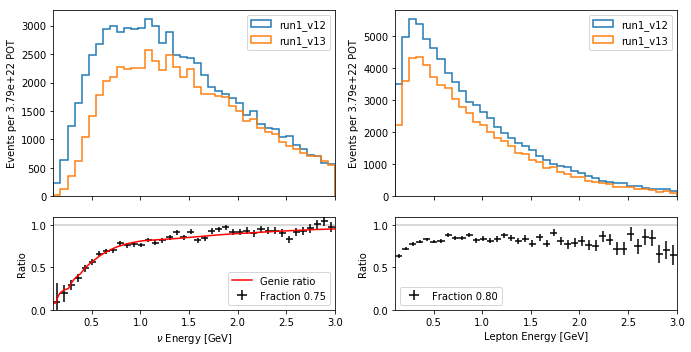

In [282]:
fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(6*gr,5.), gridspec_kw = {'height_ratios':[2, 1]}, sharex='col')

for i, (field,xmin,xmax,bins,xlab) in enumerate(zip(fields_arr, xmin_arr, xmax_arr, bins_arr, xlab_arr)):
    bin_vals = {}
    for run_lab in run_labs:
        data = df_events[run_lab].query('abs(nuPdgCode)==@pdg_sig & nuCCNC==0')[field]
        vals, edges, _ = ax[0][i].hist(data , label=run_lab, weights=[scales[run_lab]]*len(data),
                                       range=(xmin,xmax), bins=bins, 
                                       lw=1.5, histtype='step')
        bin_vals[run_lab] = vals
    ax[0][i].set_ylabel('Events per {:.3g} POT'.format(pot_v12))
    ax[0][i].legend()
    ax[0][i].set_xlim(xmin,xmax)
    #ratio
    ax[1][i].set_xlabel(xlab)
    ax[1][i].set_ylabel('Ratio')
    mids = (edges[1:]+edges[:-1])/2
    xerr = (edges[1:]-edges[:-1])/2
    yerr = np.sqrt(sum([scales[r]/bin_vals[r] for r in run_labs]))
    ax[1][i].errorbar(mids, bin_vals['run1_v13']/bin_vals['run1_v12'], xerr = xerr, yerr=yerr, fmt='none', color='k',
                     label = 'Fraction {:.2f}'.format(fraq))
    ax[1][i].axhline(y=1, alpha=0.2, color='k')
    ax[1][i].set_ylim(0.0,1.1)
    text_x = xmin+(xmax-xmin)*0.5
    fraq = sum(bin_vals['run1_v13'])/ sum(bin_vals['run1_v12'])
    #ax[1][i].text(text_x, 0.2, 'Fraction {:.2f}'.format(fraq), fontsize=12)
ax[1][0].plot(spline_x, spline_y[sig], c='r', label='Genie ratio')
ax[1][0].legend()
ax[1][1].legend()
fig.tight_layout()
fig.savefig(outdir+"xsec_"+sig+".pdf", bbox_inches="tight")

0
0
0
0
0
0
0
0
0
0


/home/wouter/Binaries/miniconda3/envs/uprootenv/lib/python3.5/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/home/wouter/Binaries/miniconda3/envs/uprootenv/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/home/wouter/Binaries/miniconda3/envs/uprootenv/lib/python3.5/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


0
0
0
0
0
0


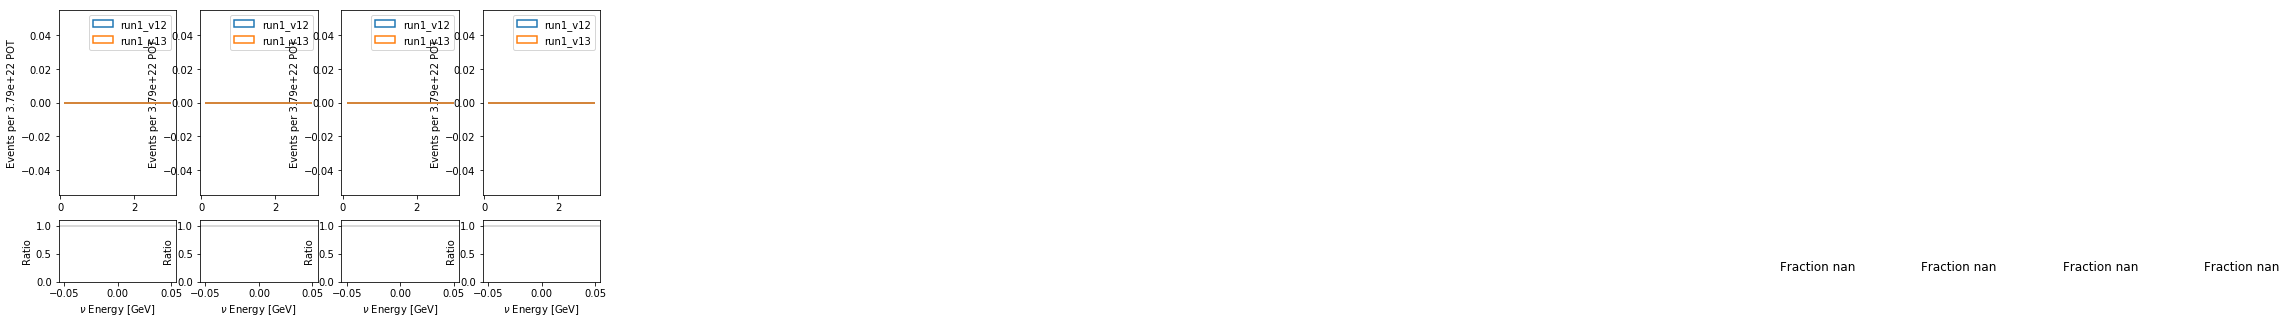

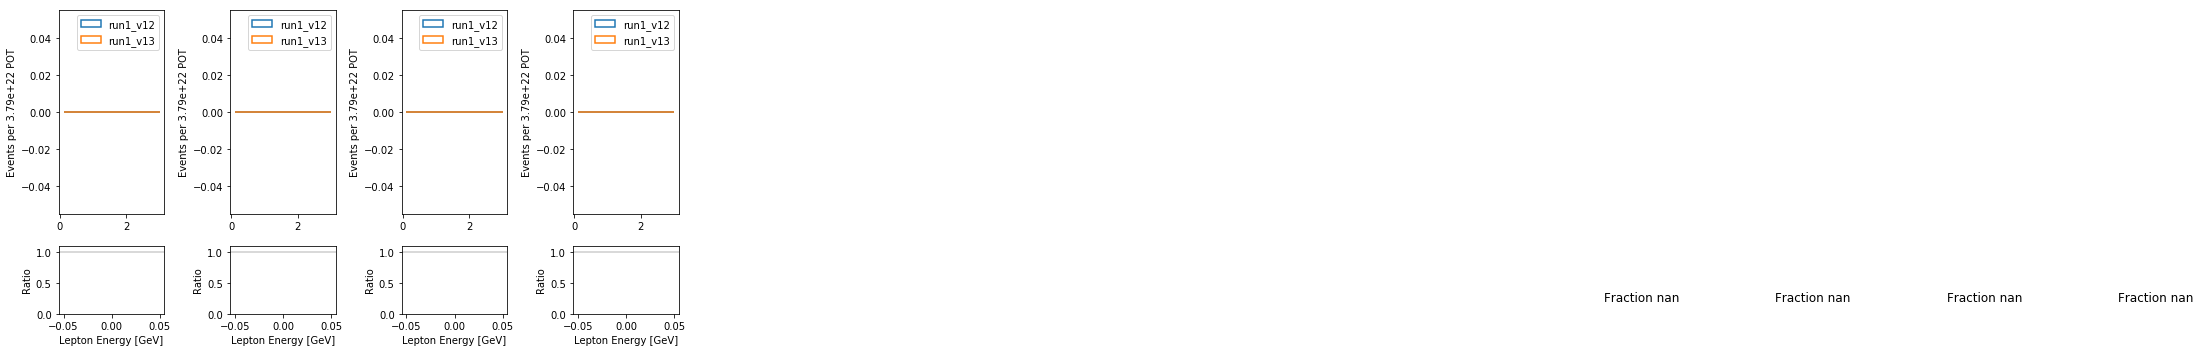

In [283]:
for field,xmin,xmax,bins,xlab in zip(fields_arr, xmin_arr, xmax_arr, bins_arr, xlab_arr):
    fig,ax=plt.subplots(ncols=4,nrows=2,figsize=(6*gr,5.), gridspec_kw = {'height_ratios':[3, 1]})
    for i,int_code in enumerate([0,1,2,10]):
        bin_vals = {}
        for run_lab in run_labs:
            data = df_events[run_lab].query('abs(nuPdgCode)==@pdg_sig & nuCCNC==0 & nuInteractionType==@int_code')[field]
            print(len(data))
            vals, edges, _ = ax[0][i].hist(data , label=run_lab, weights=[scales[run_lab]]*len(data),
                                           range=(xmin,xmax), bins=bins, 
                                           lw=1.5, histtype='step')
            bin_vals[run_lab] = vals
        ax[0][i].set_ylabel('Events per {:.3g} POT'.format(pot_v12))
        ax[0][i].legend()

        #ratio
        ax[1][i].set_xlabel(xlab)
        ax[1][i].set_ylabel('Ratio')
        mids = (edges[1:]+edges[:-1])/2
        xerr = (edges[1:]-edges[:-1])/2
        yerr = np.sqrt(sum([scales[r]/bin_vals[r] for r in run_labs]))
        ax[1][i].errorbar(mids, bin_vals['run1_v13']/bin_vals['run1_v12'], xerr = xerr, yerr=yerr, fmt='none', color='k')
        ax[1][i].axhline(y=1, alpha=0.2, color='k')
        ax[1][i].set_ylim(0.0,1.1)
        text_x = xmin+(xmax-xmin)*0.5
        fraq = sum(bin_vals['run1_v13'])/ sum(bin_vals['run1_v12'])
        ax[1][i].text(text_x, 0.2, 'Fraction {:.2f}'.format(fraq), fontsize=12)

fig.tight_layout()
fig.savefig(outdir+field+"_xsec_zoom.pdf", bbox_inches="tight")

In [148]:
df_events[run_lab]['nuInteractionType'].value_counts()

1001    59358
1002    23319
1003    22880
1000    22536
1091     9628
1004     7872
1005     6233
1008     5432
1092     4598
1006     4484
1009     3425
1007     2539
1097      255
1096      183
1013       62
1015       56
1016       32
1014       23
1098        6
Name: nuInteractionType, dtype: int64